**dividing the dataset into 99-1 train test split** 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

In [3]:
path = r'C:\Users\User\dev\training_model\dataset\modified_financial_data.csv'
df = pd.read_csv(path)

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

In [10]:
target = ['GLD']
features = [col for col in df.columns if col not in ['Date', target]]

X = df[features]
y = df[target]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

split_index = int(len(X_scaled) * 0.98)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

c:\Users\User\dev\training_model\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\User\dev\training_model\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


R² Score: 0.5802
Mean Squared Error: 0.0005


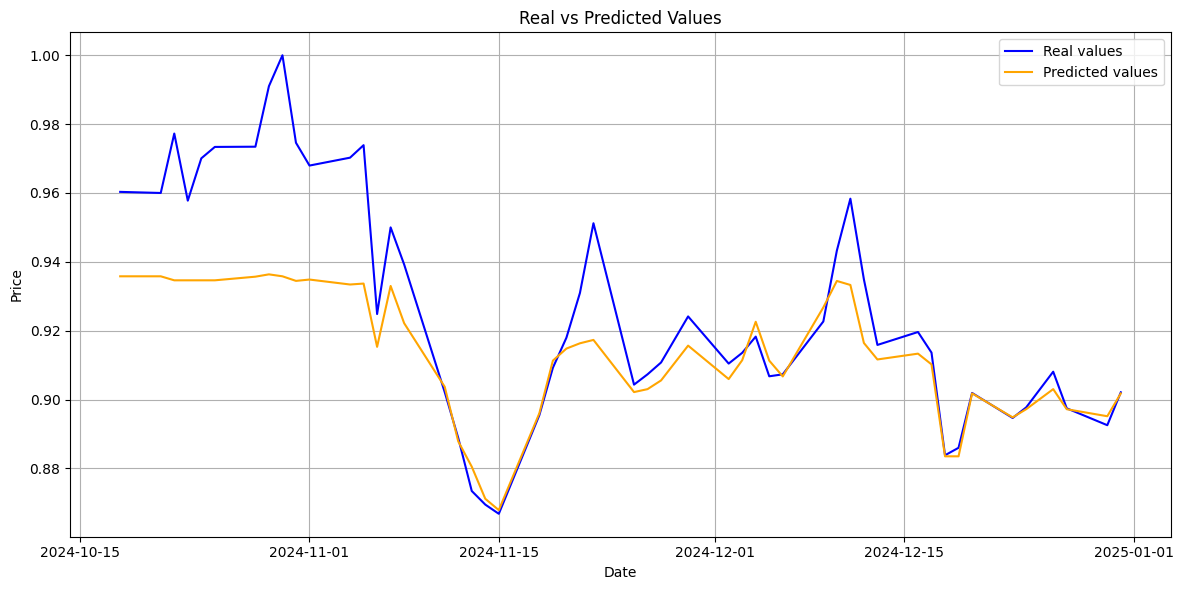

In [11]:
model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

df['Date'] = pd.to_datetime(df['Date'])

date_test = df['Date'].iloc[split_index:]

plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label='Real values', color='blue')
plt.plot(date_test, y_pred, label='Predicted values', color='orange')

plt.title('Real vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**same method with lags dataset**

In [12]:
path = r'C:\Users\User\dev\training_model\dataset\dataset_v4.csv'
df = pd.read_csv(path)

df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)

df.head()

,Date,Close,Volume,CPIAUCSL,FEDFUNDS,sp500,usd_index,Open_prev,High_prev,Low_prev,...,Close_pct_change94,Close_pct_change96,Close_pct_change98,Close_pct_change100,Close_pct_change102,Close_pct_change104,year,month,day_of_year,time_index
0,2001-02-15,255.100006,23.0,176.0,5.49,1326.609985,113.199997,260.000000,260.000000,259.399994,...,-6.761696,-8.369249,-6.931777,-5.623375,-6.178738,-6.316556,2001,2,46,0
1,2001-02-16,258.200012,2.0,176.0,5.49,1301.530029,112.260002,259.500000,259.500000,255.100006,...,-5.455875,-6.313495,-5.732012,-5.003670,-4.014865,-4.863663,2001,2,47,1
2,2001-02-20,256.100006,24.0,176.0,5.49,1278.939941,112.820000,255.000000,258.500000,255.000000,...,-5.706922,-6.396199,-8.010053,-6.566946,-5.253416,-5.810956,2001,2,51,2
3,2001-02-21,258.200012,40.0,176.0,5.49,1255.270020,113.120003,256.100006,256.100006,255.000000,...,-4.476499,-5.455875,-6.313495,-5.732012,-5.003670,-4.014865,2001,2,52,3
4,2001-02-22,258.500000,16.0,176.0,5.49,1252.819946,113.339996,256.700012,258.200012,256.600006,...,-4.471547,-4.823272,-5.519008,-7.147986,-5.691356,-4.365515,2001,2,53,4


In [15]:
df = df.query("Date >= '2015-01-01'")

In [16]:
df.head()

,Date,Close,Volume,CPIAUCSL,FEDFUNDS,sp500,usd_index,Open_prev,High_prev,Low_prev,...,Close_pct_change94,Close_pct_change96,Close_pct_change98,Close_pct_change100,Close_pct_change102,Close_pct_change104,year,month,day_of_year,time_index
3475,2015-01-02,1186.000000,138.0,234.747,0.11,2058.199951,91.080002,1199.199951,1199.199951,1182.699951,...,-8.424058,-9.083940,-9.658748,-9.361865,-9.520907,-7.632399,2015,1,2,3475
3476,2015-01-05,1203.900024,470.0,234.747,0.11,2020.579956,91.379997,1184.000000,1194.500000,1169.500000,...,-6.919746,-7.228168,-8.372022,-8.014977,-8.022003,-7.867141,2015,1,5,3476
3477,2015-01-06,1219.300049,97.0,234.747,0.11,2002.609985,91.500000,1180.300049,1206.900024,1180.099976,...,-4.271014,-5.852824,-6.531234,-7.122181,-6.816962,-6.980470,2015,1,6,3477
3478,2015-01-07,1210.599976,29.0,234.747,0.11,2025.900024,91.889999,1203.500000,1220.000000,1203.500000,...,-5.318317,-6.401736,-6.711873,-7.862094,-7.503062,-7.510127,2015,1,7,3478
3479,2015-01-08,1208.400024,92.0,234.747,0.11,2062.139893,92.370003,1219.199951,1219.199951,1210.599976,...,-5.394193,-5.126790,-6.694460,-7.366805,-7.952470,-7.649979,2015,1,8,3479


In [18]:
df.columns

Index(['Date', 'Close', 'Volume', 'CPIAUCSL', 'FEDFUNDS', 'sp500', 'usd_index',
       'Open_prev', 'High_prev', 'Low_prev', 'Close_2th_day', 'Close_3th_day',
       'Close_4th_day', 'Close_5th_day', 'Close_6th_day', 'Close_7th_day',
       'Close_8th_day', 'Close_9th_day', 'Close_10th_day', 'Close_pct_change2',
       'Close_pct_change4', 'Close_pct_change6', 'Close_pct_change8',
       'Close_pct_change10', 'Close_pct_change12', 'Close_pct_change14',
       'Close_pct_change16', 'Close_pct_change18', 'Close_pct_change20',
       'Close_pct_change22', 'Close_pct_change24', 'Close_pct_change26',
       'Close_pct_change28', 'Close_pct_change30', 'Close_pct_change32',
       'Close_pct_change34', 'Close_pct_change36', 'Close_pct_change38',
       'Close_pct_change40', 'Close_pct_change42', 'Close_pct_change44',
       'Close_pct_change46', 'Close_pct_change48', 'Close_pct_change50',
       'Close_pct_change52', 'Close_pct_change54', 'Close_pct_change56',
       'Close_pct_change58', 'Cl

In [19]:
drop = ['Volume', 'CPIAUCSL', 'FEDFUNDS', 'sp500', 'usd_index', 'year', 'month', 'day_of_year', 'time_index']

df = df.drop(columns=drop)

df.columns

Index(['Date', 'Close', 'Open_prev', 'High_prev', 'Low_prev', 'Close_2th_day',
       'Close_3th_day', 'Close_4th_day', 'Close_5th_day', 'Close_6th_day',
       'Close_7th_day', 'Close_8th_day', 'Close_9th_day', 'Close_10th_day',
       'Close_pct_change2', 'Close_pct_change4', 'Close_pct_change6',
       'Close_pct_change8', 'Close_pct_change10', 'Close_pct_change12',
       'Close_pct_change14', 'Close_pct_change16', 'Close_pct_change18',
       'Close_pct_change20', 'Close_pct_change22', 'Close_pct_change24',
       'Close_pct_change26', 'Close_pct_change28', 'Close_pct_change30',
       'Close_pct_change32', 'Close_pct_change34', 'Close_pct_change36',
       'Close_pct_change38', 'Close_pct_change40', 'Close_pct_change42',
       'Close_pct_change44', 'Close_pct_change46', 'Close_pct_change48',
       'Close_pct_change50', 'Close_pct_change52', 'Close_pct_change54',
       'Close_pct_change56', 'Close_pct_change58', 'Close_pct_change60',
       'Close_pct_change62', 'Close_pct_chan

In [20]:
target = ['Close']
features = [col for col in df.columns if col not in ['Date', target]]

X = df[features]
y = df[target]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

split_index = int(len(X_scaled) * 0.98)
X_train, X_test = X_scaled[:split_index], X_scaled[split_index:]
y_train, y_test = y_scaled[:split_index], y_scaled[split_index:]

c:\Users\User\dev\training_model\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R² Score: -4.4971
Mean Squared Error: 0.0108


c:\Users\User\dev\training_model\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


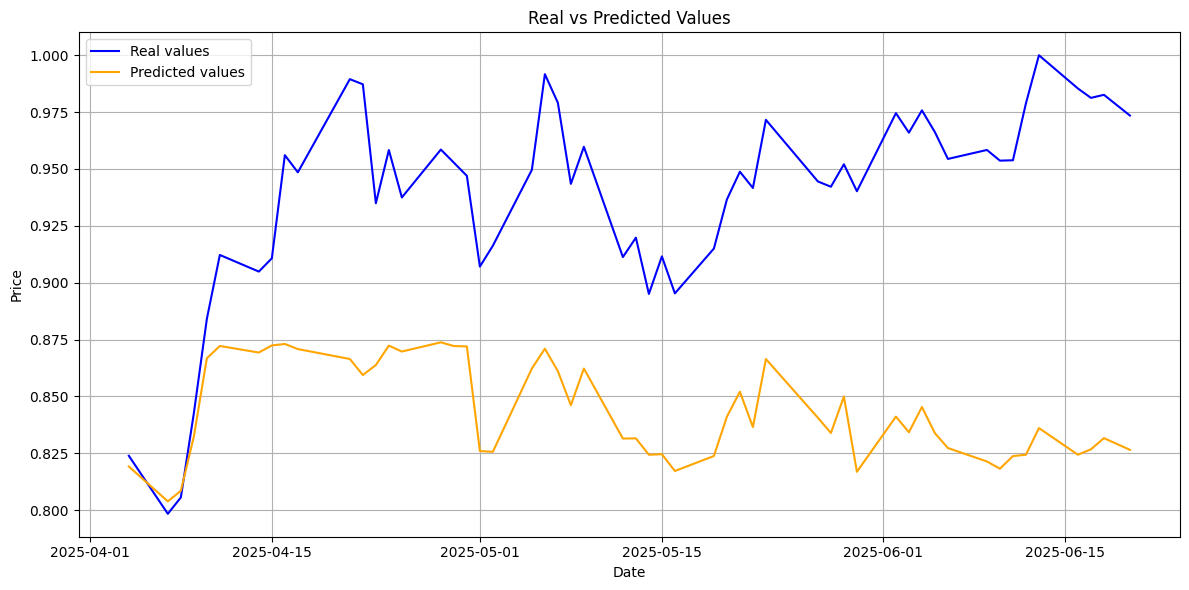

In [21]:
model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

df['Date'] = pd.to_datetime(df['Date'])

date_test = df['Date'].iloc[split_index:]

plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label='Real values', color='blue')
plt.plot(date_test, y_pred, label='Predicted values', color='orange')

plt.title('Real vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
drop = ['Close_pct_change2', 'Close_pct_change4', 'Close_pct_change6',
       'Close_pct_change8', 'Close_pct_change10', 'Close_pct_change12',
       'Close_pct_change14', 'Close_pct_change16', 'Close_pct_change18',
       'Close_pct_change20', 'Close_pct_change22', 'Close_pct_change24',
       'Close_pct_change26', 'Close_pct_change28', 'Close_pct_change30',
       'Close_pct_change32', 'Close_pct_change34', 'Close_pct_change36',
       'Close_pct_change38', 'Close_pct_change40', 'Close_pct_change42',
       'Close_pct_change44', 'Close_pct_change46', 'Close_pct_change48',
       'Close_pct_change50', 'Close_pct_change52', 'Close_pct_change54',
       'Close_pct_change56', 'Close_pct_change58', 'Close_pct_change60',
       'Close_pct_change62', 'Close_pct_change64', 'Close_pct_change66',
       'Close_pct_change68', 'Close_pct_change70', 'Close_pct_change72',
       'Close_pct_change74', 'Close_pct_change76', 'Close_pct_change78',
       'Close_pct_change80', 'Close_pct_change82', 'Close_pct_change84',
       'Close_pct_change86', 'Close_pct_change88', 'Close_pct_change90',
       'Close_pct_change92', 'Close_pct_change94', 'Close_pct_change96',
       'Close_pct_change98', 'Close_pct_change100', 'Close_pct_change102',
       'Close_pct_change104']

df = df.drop(columns=drop)

df.columns

Index(['Date', 'Close', 'Open_prev', 'High_prev', 'Low_prev', 'Close_2th_day',
       'Close_3th_day', 'Close_4th_day', 'Close_5th_day', 'Close_6th_day',
       'Close_7th_day', 'Close_8th_day', 'Close_9th_day', 'Close_10th_day'],
      dtype='object')

In [24]:
target = ['Close']
features = [col for col in df.columns if col not in ['Date', target]]

X = df[features]
y = df[target]

In [25]:
split_index = int(len(X_scaled) * 0.98)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

c:\Users\User\dev\training_model\.venv\Lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


R² Score: -2.3413
Mean Squared Error: 37048.1839


c:\Users\User\dev\training_model\.venv\Lib\site-packages\sklearn\ensemble\_forest.py:611: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


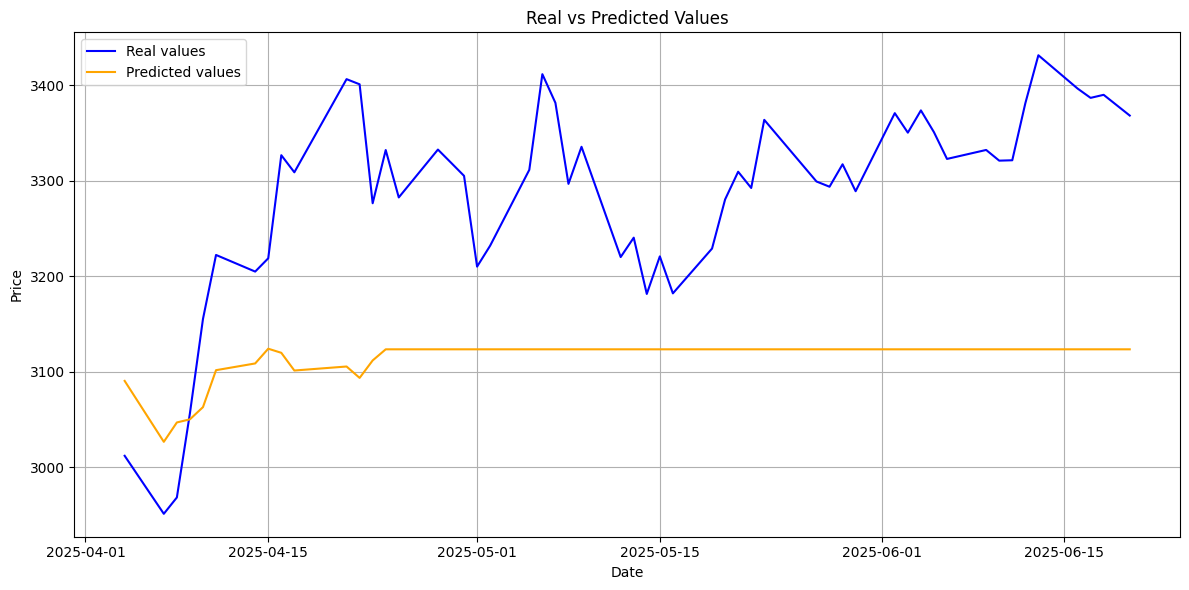

In [26]:
model = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

df['Date'] = pd.to_datetime(df['Date'])

date_test = df['Date'].iloc[split_index:]

plt.figure(figsize=(12, 6))
plt.plot(date_test, y_test, label='Real values', color='blue')
plt.plot(date_test, y_pred, label='Predicted values', color='orange')

plt.title('Real vs Predicted Values')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
#--- addind lags to this method does not help in improving model performance